In [76]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Concatenate
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import  Dropout, Activation, Conv2D, Input, Average, Maximum, Add, Subtract, Multiply
from tensorflow.keras.datasets import cifar10
import os
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt

**Загрузка датасета**

In [77]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [78]:
# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


**1. Обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете сifar10**

In [79]:
# конфигурирование слоев нейросети
model = Sequential()

# 1- й сверточный слой + MaxPooling
model.add(Conv2D(32, (3, 3), padding='valid', input_shape=X_train.shape[1:]))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# 2- й сверточный слой + MaxPooling
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# 3-й сверточный слой 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model.add(Flatten())

# 1-й полносвязный слой 
model.add(Dense(1024))
model.add(Activation('relu'))
# предотвращение переобучения
model.add(Dropout(0.5))

# 2-й полносвязный слой 
model.add(Dense(1024))
model.add(Activation('relu'))
# предотвращение переобучения
model.add(Dropout(0.5))

# выходной слой с функцией активации softmax
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_74 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
activation_75 (Activation)   (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 6, 6, 32)        

In [80]:
df = pd.DataFrame(columns=['Тип эксперимента', 'train accuracy', 'val_accuracy'])

In [81]:
# Обучаем модель
hist = model.fit(X_train, y_train,
                 epochs= 20,
                 batch_size= 32,
                 validation_data=(X_test, y_test),
                 verbose=1)

train_acc = hist.history['accuracy'][-1]
val_acc = hist.history['val_accuracy'][-1]

df = df.append({'Тип эксперимента': "AlexNet CNN: 3 сверт. сл. + 2 полносвяз. сл.", 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)

Epoch 1/20
1563/1563 [==============================] - 102s 65ms/step - loss: 1.8692 - accuracy: 0.2930 - val_loss: 1.8352 - val_accuracy: 0.3528
Epoch 2/20
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6650 - accuracy: 0.3801 - val_loss: 1.7360 - val_accuracy: 0.3979
Epoch 3/20
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6103 - accuracy: 0.4023 - val_loss: 1.6394 - val_accuracy: 0.4309
Epoch 4/20
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5683 - accuracy: 0.4228 - val_loss: 1.5460 - val_accuracy: 0.4561
Epoch 5/20
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5471 - accuracy: 0.4311 - val_loss: 1.5532 - val_accuracy: 0.4548
Epoch 6/20
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5275 - accuracy: 0.4383 - val_loss: 1.6916 - val_accuracy: 0.3980
Epoch 7/20
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5159 - accuracy: 0.4444 - val_loss: 1

Text(0.5, 1.0, 'AlexNet CNN:3 сверт. сл. + 2 полносвяз. сл.')

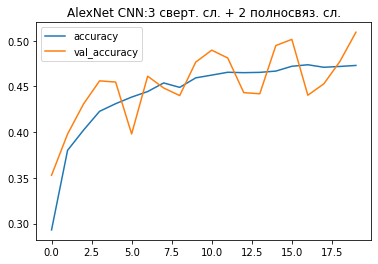

In [102]:
pd.DataFrame(hist.history)[['accuracy','val_accuracy']].plot()
plt.title("AlexNet CNN:3 сверт. сл. + 2 полносвяз. сл.")

**2. Оценить рост точности при увеличении ширины сети (больше ядер).**

In [82]:
# конфигурирование слоев нейросети
model_2 = Sequential()

# 1- й сверточный слой + MaxPooling
model_2.add(Conv2D(32, (3, 3), padding='valid', input_shape=X_train.shape[1:]))
model_2.add(Activation('relu')) 
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.5))

# 2- й сверточный слой + MaxPooling
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.5))

# 3-й сверточный слой 
#model.add(Conv2D(128, (3, 3)))
#model.add(Activation('relu'))

# 4-й сверточный слой 
model_2.add(Conv2D(252, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.5))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_2.add(Flatten())

# 1-й полносвязный слой 
model_2.add(Dense(1024))
model_2.add(Activation('relu'))
# предотвращение переобучения
model_2.add(Dropout(0.5))

# 2-й полносвязный слой 
model_2.add(Dense(1024))
model_2.add(Activation('relu'))
# предотвращение переобучения
model_2.add(Dropout(0.5))

# выходной слой с функцией активации softmax
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

# компиляция модели
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_80 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_81 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 6, 6, 64)        

In [83]:
# Обучаем модель
hist_2 = model_2.fit(X_train, y_train,
                 epochs= 20,
                 batch_size= 32,
                 validation_data=(X_test, y_test),
                 verbose=1)

train_acc = hist_2.history['accuracy'][-1]
val_acc = hist_2.history['val_accuracy'][-1]

df = df.append({'Тип эксперимента': "AlexNet CNN: больше ядер", 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)

Epoch 1/20
1563/1563 [==============================] - 156s 99ms/step - loss: 1.7892 - accuracy: 0.3252 - val_loss: 1.6938 - val_accuracy: 0.4035
Epoch 2/20
1563/1563 [==============================] - 154s 98ms/step - loss: 1.5454 - accuracy: 0.4346 - val_loss: 1.4645 - val_accuracy: 0.4553
Epoch 3/20
1563/1563 [==============================] - 153s 98ms/step - loss: 1.4737 - accuracy: 0.4654 - val_loss: 1.3965 - val_accuracy: 0.5064
Epoch 4/20
1563/1563 [==============================] - 155s 99ms/step - loss: 1.4461 - accuracy: 0.4785 - val_loss: 1.3644 - val_accuracy: 0.5177
Epoch 5/20
1563/1563 [==============================] - 154s 98ms/step - loss: 1.4196 - accuracy: 0.4934 - val_loss: 1.6104 - val_accuracy: 0.4426
Epoch 6/20
1563/1563 [==============================] - 154s 98ms/step - loss: 1.4022 - accuracy: 0.5017 - val_loss: 1.4204 - val_accuracy: 0.5051
Epoch 7/20
1563/1563 [==============================] - 155s 99ms/step - loss: 1.3884 - accuracy: 0.5069 - val_loss: 1

Text(0.5, 1.0, 'AlexNet: больше ядер')

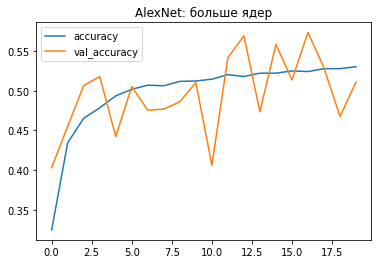

In [103]:
pd.DataFrame(hist_2.history)[['accuracy','val_accuracy']].plot()
plt.title("AlexNet: больше ядер")

**3. Оценить рост точности при увеличении глубины сети (больше слоев).**

In [84]:
# конфигурирование слоев нейросети
model_3 = Sequential()

# 1- й сверточный слой + MaxPooling
model_3.add(Conv2D(32, (3, 3), padding='valid', input_shape=X_train.shape[1:]))
model_3.add(Activation('relu')) 
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.5))

# 2- й сверточный слой + MaxPooling
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.5))

# 3-й сверточный слой 
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
#model_3.add(MaxPooling2D(pool_size=(2, 2)))
#model_3.add(Dropout(0.5))

# 4-й сверточный слой 
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.5))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
model_3.add(Flatten())

# 1-й полносвязный слой 
model_3.add(Dense(1024))
model_3.add(Activation('relu'))
# предотвращение переобучения
model_3.add(Dropout(0.5))

# 2-й полносвязный слой 
model_3.add(Dense(1024))
model_3.add(Activation('relu'))
# предотвращение переобучения
model_3.add(Dropout(0.5))

# выходной слой с функцией активации softmax
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

# компиляция модели
model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_86 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
activation_87 (Activation)   (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 6, 6, 32)        

In [85]:
# Обучаем модель
hist_3 = model_3.fit(X_train, y_train,
                 epochs= 20,
                 batch_size= 32,
                 validation_data=(X_test, y_test),
                 verbose=1)

train_acc = hist_3.history['accuracy'][-1]
val_acc = hist_3.history['val_accuracy'][-1]

df = df.append({'Тип эксперимента': "AlexNet CNN: больше слоев", 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)

Epoch 1/20
1563/1563 [==============================] - 97s 61ms/step - loss: 1.8948 - accuracy: 0.2655 - val_loss: 1.6749 - val_accuracy: 0.3787
Epoch 2/20
1563/1563 [==============================] - 96s 61ms/step - loss: 1.6825 - accuracy: 0.3686 - val_loss: 1.5679 - val_accuracy: 0.4265
Epoch 3/20
1563/1563 [==============================] - 95s 61ms/step - loss: 1.6175 - accuracy: 0.4006 - val_loss: 1.5234 - val_accuracy: 0.4464
Epoch 4/20
1563/1563 [==============================] - 95s 61ms/step - loss: 1.5784 - accuracy: 0.4220 - val_loss: 1.6103 - val_accuracy: 0.4365
Epoch 5/20
1563/1563 [==============================] - 96s 61ms/step - loss: 1.5415 - accuracy: 0.4398 - val_loss: 1.4974 - val_accuracy: 0.4904
Epoch 6/20
1563/1563 [==============================] - 97s 62ms/step - loss: 1.5237 - accuracy: 0.4479 - val_loss: 1.6315 - val_accuracy: 0.4196
Epoch 7/20
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5138 - accuracy: 0.4562 - val_loss: 1.5314 

Text(0.5, 1.0, 'AlexNet: больше слоев')

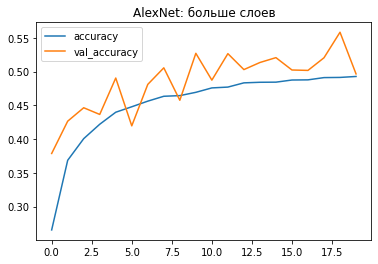

In [104]:
pd.DataFrame(hist_3.history)[['accuracy','val_accuracy']].plot()
plt.title("AlexNet: больше слоев")

**4. Cравнить с точностью полносвязной сети для этой выборки**

In [86]:
x_input = keras.layers.Input(X_train.shape[1:])
x = keras.layers.Flatten()(x_input)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dense(128, activation='relu')(x)
x_output = keras.layers.Dense(10, activation='softmax')(x)
model_4=keras.models.Model(x_input,x_output)


# Compile the model.
model_4.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )



In [87]:
# Train the model.
hist_4 = model_4.fit(X_train, y_train,
                 epochs= 20,
                 batch_size= 32,
                 validation_data=(X_test, y_test))

train_acc = hist_4.history['accuracy'][-1]
val_acc = hist_4.history['val_accuracy'][-1]

df = df.append({'Тип эксперимента':  "Полносвязная модель", 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)

Epoch 1/20
1563/1563 [==============================] - 28s 17ms/step - loss: 1.9058 - accuracy: 0.3026 - val_loss: 1.7984 - val_accuracy: 0.3466
Epoch 2/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.7886 - accuracy: 0.3509 - val_loss: 1.7701 - val_accuracy: 0.3630
Epoch 3/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.7387 - accuracy: 0.3720 - val_loss: 1.7012 - val_accuracy: 0.3846
Epoch 4/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.7049 - accuracy: 0.3823 - val_loss: 1.7112 - val_accuracy: 0.3814
Epoch 5/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6754 - accuracy: 0.3932 - val_loss: 1.6684 - val_accuracy: 0.4009
Epoch 6/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6510 - accuracy: 0.4040 - val_loss: 1.6730 - val_accuracy: 0.3969
Epoch 7/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6384 - accuracy: 0.4086 - val_loss: 1.6145 -

Text(0.5, 1.0, 'Полносвязная модель')

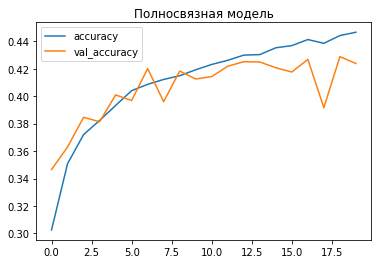

In [105]:
pd.DataFrame(hist_4.history)[['accuracy','val_accuracy']].plot()
plt.title("Полносвязная модель")

**Выводы**

Сводная таблица показателей accuracy в каждом эксперименте.

In [116]:
df.sort_values(by='val_accuracy', ascending=False)

,Тип эксперимента,train accuracy,val_accuracy
1,AlexNet CNN: больше ядер,0.53004,0.5107
0,AlexNet CNN: 3 сверт. сл. + 2 полносвяз. сл.,0.47298,0.5093
2,AlexNet CNN: больше слоев,0.49272,0.4965
3,Полносвязная модель,0.44656,0.4238


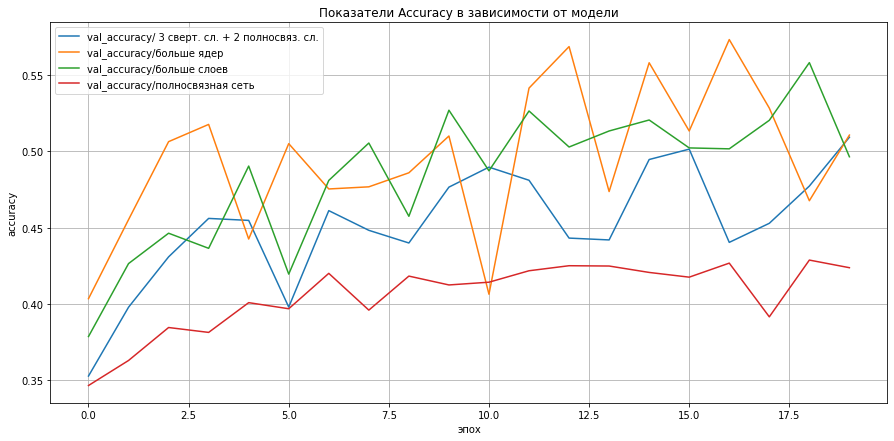

In [99]:
plt.figure(figsize=(15,7))
#plt.plot(hist.history['accuracy'], label = 'train_accuracy/ 3 сверт. сл. + 2 полносвяз. сл.')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy/ 3 сверт. сл. + 2 полносвяз. сл.')
#plt.plot(hist_2.history['accuracy'], label = 'train_accuracy/больше ядер')
plt.plot(hist_2.history['val_accuracy'], label = 'val_accuracy/больше ядер')
#plt.plot(hist_3.history['accuracy'], label = 'train_accuracy/больше слоев')
plt.plot(hist_3.history['val_accuracy'], label = 'val_accuracy/больше слоев')
#plt.plot(hist_4.history['accuracy'], label = 'train_accuracy/полносвязная сеть')
plt.plot(hist_4.history['val_accuracy'], label = 'val_accuracy/полносвязная сеть')
plt.xlabel('эпох')
plt.ylabel('accuracy')
plt.legend()
plt.grid('On')
plt.title('Показатели Accuracy в зависимости от модели')
plt.show()


- В целом построенные модели показали низкий уровень accuracy.
- Из 4-х экспериментальных моделей лучшее accuracy замечено у модели с большим количеством ядер.
- На втором месте модель с большим количеством слоев.
- На третьем исходная модель с 3-мя сверточными слоями и двумя полносвязными.
- Наименьший показатель accuracy замечен у полносвязной модели.

Рост точности произошел при увеличении ширины сети (больше ядер).